# Unsupervised Learning: Wine Analysis

Import necessary libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN

Load the dataset

In [15]:
# Assuming the dataset is in a CSV file named 'ratings.csv'
df = pd.read_csv('wine-clustering.csv')

# Display the first few rows of the dataset
print(df.head())

print(df.columns)

   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45    

Clean the data for missing values & standardize

In [16]:
print(df.isnull().sum())

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64


#### Objective

The main objective of this wine analysis using clustering is to uncover the underlying structure within the wine dataset and identify distinct groups of wines based on their features. This can help us understand the relationships and similarities between different wines, which may not be immediately apparent from the raw data since the data is unsupervised.

By using features such as alcohol content, malic acid, and others, we aim to group wines that have similar characteristics. This can provide valuable insights, such as identifying common properties of high-quality wines or understanding the factors that contribute to different wine tastes.

#### Analysis

Apply the elbow method to determine the number of clusters

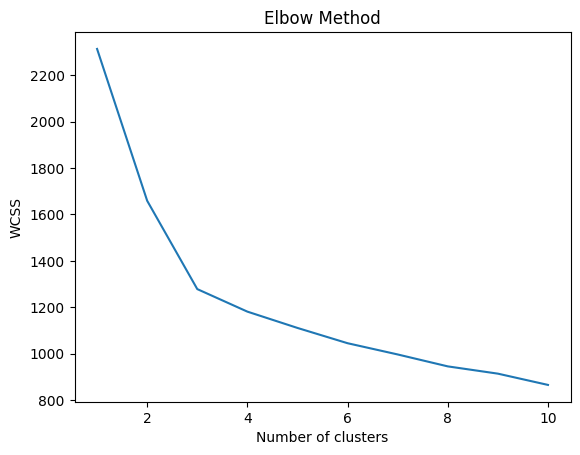

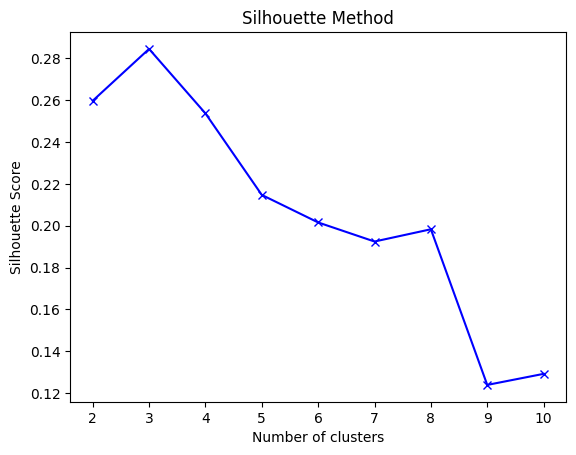

In [17]:
# Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Silhouette score
silhouette_scores = []
for n_cluster in range(2, 11):
    silhouette_scores.append(silhouette_score(df_scaled, KMeans(n_clusters = n_cluster).fit_predict(df_scaled)))
plt.plot(range(2, 11), silhouette_scores, 'bx-')
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

After determining the number of clusters using the elbow method, now we can build different unsupervised learning models.

Build K-means Model

In [18]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df_scaled)

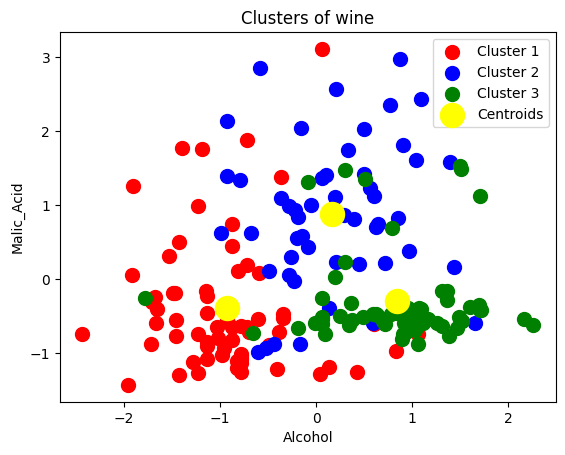

In [19]:
plt.scatter(df_scaled[pred_y == 0, 0], df_scaled[pred_y == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(df_scaled[pred_y == 1, 0], df_scaled[pred_y == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(df_scaled[pred_y == 2, 0], df_scaled[pred_y == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of wine')
plt.xlabel('Alcohol')
plt.ylabel('Malic_Acid')
plt.legend()
plt.show()

Apply PCA

In [20]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_scaled)

In [21]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

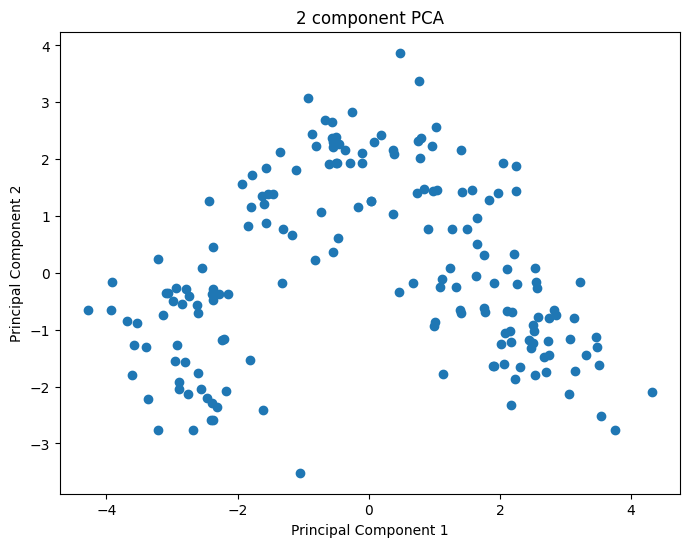

In [22]:
plt.figure(figsize=(8,6))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 component PCA')
plt.show()

Apply KMeans after PCA is competed

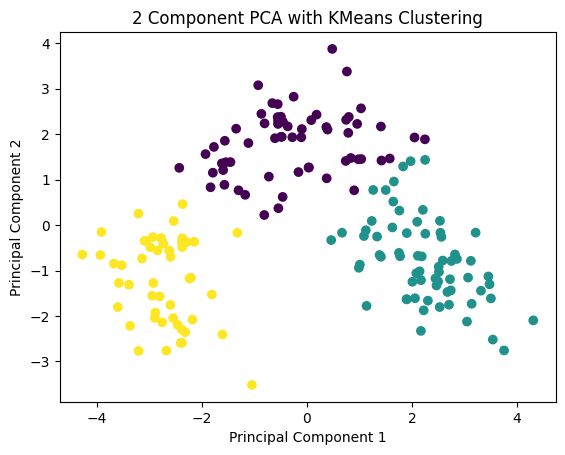

In [23]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(principalDf)

plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c=kmeans.labels_)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 Component PCA with KMeans Clustering')
plt.show()

In [24]:
print(pd.DataFrame(pca.components_,columns=df.columns,index = ['PC-1','PC-2']))

       Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
PC-1  0.144329   -0.245188 -0.002051     -0.239320   0.141992       0.394661   
PC-2 -0.483652   -0.224931 -0.316069      0.010591  -0.299634      -0.065040   

      Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
PC-1    0.422934             -0.298533         0.313429        -0.088617   
PC-2    0.003360             -0.028779        -0.039302        -0.529996   

           Hue     OD280   Proline  
PC-1  0.296715  0.376167  0.286752  
PC-2  0.279235  0.164496 -0.364903  


Gaussian Mixture Model

In [33]:
gmm = GaussianMixture(n_components=3)
gmm.fit(df_scaled)

labels = gmm.predict(df_scaled)

df['labels'] = labels

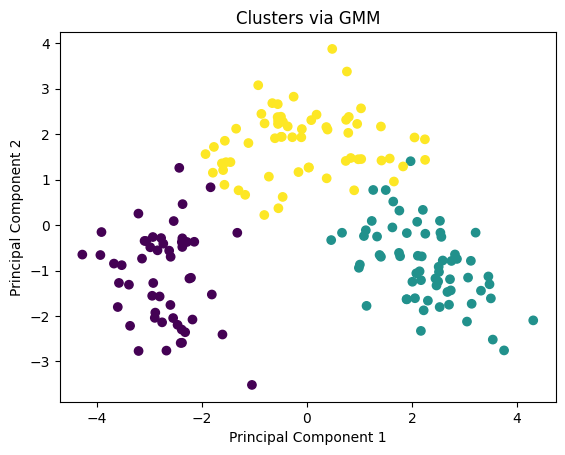

In [34]:
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c=df['labels'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters via GMM')
plt.show()

#### Findings

First we used the elbow method to find the number of clusters that we need to divide our dataset into.

Then we applied three different unsupervised learning algorithms:

1. KMeans

2. PCA with KMeans

3. GMM

We observed that first KMeans algorithm is the least successful one out of all three applied as it can be observed in the cluster graph of it. 

GMM and KMeans using PCA performed dramatically better compared to initial KMeans algorithm and gave more distinct results compared to it. 

But GMM performed a little worse compared to PCA with KMeans with a few errors which also can be noise. 

In order to improve the performance this model, 

- We can detect and remove the outliers, 

- Apply feature engineering,

- Increase the size of our dataset for more accurate analysis.